In [1]:
import pandas as pd
from fastai.vision.all import *
from pathlib import Path
import itertools
import progressbar
import re

In [2]:
DATASET_PATH = Path('/home/lleonard/Documents/datasets/best_art/resized/resized/')

In [3]:
artist_name_regexp = re.compile('([A-Za-zк├\-_ИаХDuт╠И]*)_([0-9]*)\.jpg')

def get_y(filename):
    matches = artist_name_regexp.match(filename.name)
    return matches[1]

In [5]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   item_tfms=Resize((224,224)),
                   batch_tfms=[*aug_transforms(),Normalize()],
                   get_items=get_image_files, get_y = get_y)
#dblock.summary(str(DATASET_PATH))

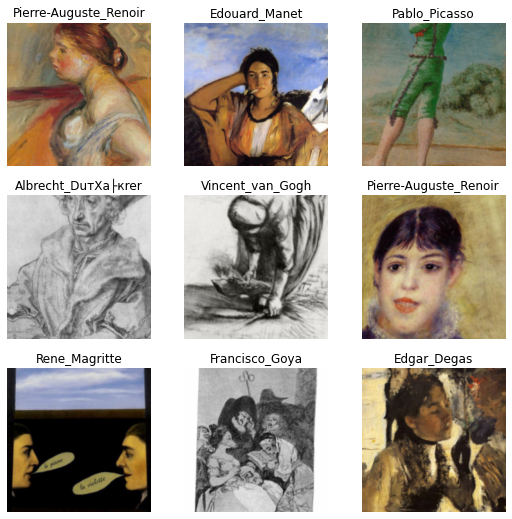

In [8]:
dataloaders = dblock.dataloaders(str(DATASET_PATH), bs=128)
dataloaders.show_batch()

In [9]:
learner = cnn_learner(dataloaders, models.vgg16_bn, metrics = accuracy).to_fp16()
learner.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.010964781977236271)

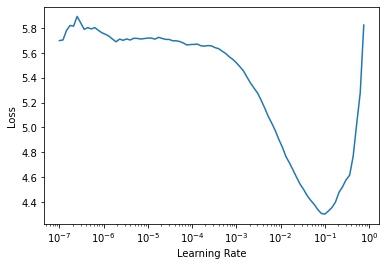

In [10]:
learner.lr_find()

In [11]:
learner.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.306401,2.235261,0.421659,00:22
1,2.727523,1.574573,0.556452,00:21
2,1.930178,1.381724,0.595046,00:21
3,1.476694,1.150998,0.672235,00:21
4,1.222410,1.112386,0.665899,00:21
5,1.036197,1.117737,0.660138,00:21
6,0.907271,0.982842,0.697005,00:21
7,0.801460,0.960123,0.690668,00:21
8,0.736912,0.946480,0.701613,00:22
9,0.682991,0.937012,0.703341,00:22


In [12]:
learner.unfreeze()

In [13]:
learner.fit_one_cycle(10, slice(3e-5, 3e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.690915,0.974675,0.702189,00:29
1,0.757414,1.110885,0.668779,00:28
2,0.827357,1.544451,0.611175,00:28
3,0.729563,1.063408,0.712558,00:28
4,0.571626,1.151375,0.683756,00:28
5,0.437777,0.890687,0.751728,00:28
6,0.320878,0.785147,0.758641,00:28
7,0.235248,0.681599,0.794355,00:29
8,0.182222,0.680843,0.786290,00:28
9,0.157305,0.664657,0.787442,00:28


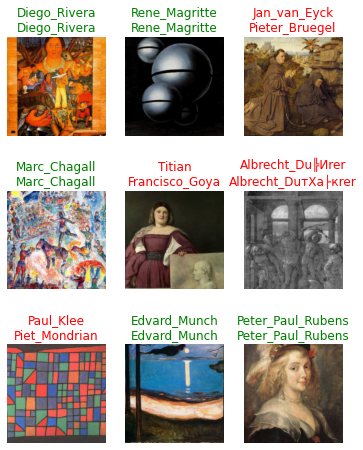

In [14]:
learner.show_results(ds_idx=1, nrows=3, figsize=(6,8))

In [15]:
torch.save(learner.model, './models/paintings_artist_classifier.pth')